<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/NND_Cla_Clothes_PyT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [1]:
# Basic libraries
import matplotlib.pyplot as plt

# Deep Learning 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose


In [2]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


#**Load data**

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


#**Create model**

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
      """
        Function that defines the structure of the neural network
      """
      super(NeuralNetwork, self).__init__()

      self.flatten = nn.Flatten()
      self.linear_relu_stack = nn.Sequential(nn.Linear(28*28, 512),
                                               nn.ReLU(),
                                               nn.Linear(512, 512),
                                               nn.ReLU(),
                                               nn.Linear(512, 10)
      )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
# Cost function
loss_fn = nn.CrossEntropyLoss()

# Optimization
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


In [7]:
def train(dataloader, model, loss_fn, optimizer):
  """
    Training neural network
      Input 
        dataloader: dataset
        model: structure of neural network
        loss_fn: cost function of neural network
        optimizer: optmization of neural network
  """
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.318537  [    0/60000]
loss: 2.295089  [ 6400/60000]
loss: 2.274011  [12800/60000]
loss: 2.250698  [19200/60000]
loss: 2.243445  [25600/60000]
loss: 2.211896  [32000/60000]
loss: 2.220745  [38400/60000]
loss: 2.187192  [44800/60000]
loss: 2.175524  [51200/60000]
loss: 2.130313  [57600/60000]
Test Error: 
 Accuracy: 33.0%, Avg loss: 2.135675 

Epoch 2
-------------------------------
loss: 2.156044  [    0/60000]
loss: 2.138664  [ 6400/60000]
loss: 2.077760  [12800/60000]
loss: 2.082165  [19200/60000]
loss: 2.036794  [25600/60000]
loss: 1.971772  [32000/60000]
loss: 1.996611  [38400/60000]
loss: 1.915156  [44800/60000]
loss: 1.920738  [51200/60000]
loss: 1.843489  [57600/60000]
Test Error: 
 Accuracy: 56.5%, Avg loss: 1.845014 

Epoch 3
-------------------------------
loss: 1.889728  [    0/60000]
loss: 1.849560  [ 6400/60000]
loss: 1.732721  [12800/60000]
loss: 1.765062  [19200/60000]
loss: 1.665874  [25600/60000]
loss: 1.620009  [32000/600

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [11]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

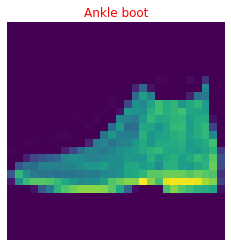

In [12]:
classes = [ "T-shirt/top", 
           "Trouser",
            "Pullover",
            "Dress",
            "Coat",
            "Sandal",
            "Shirt",
            "Sneaker",
            "Bag",
            "Ankle boot"]

model.eval()
x, y = test_data[0][0], test_data[0][1]

plt.imshow(x[0])
plt.axis(False)
plt.title(classes[y], c='r')
plt.show()


In [13]:
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
